<a href="https://colab.research.google.com/github/tzlilLV97/Deep-Learning-Final-Project/blob/main/DataAnalistForDnnProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import collections

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
csv_path = '/content/gdrive/My Drive/Colab Notebooks/DNNPROJECT/games.csv' 

Mounted at /content/gdrive


Load the data set and drop the first columns (gameID, season, create time)

In [ ]:
#load data
df = pd.read_csv(csv_path)
# champion_info=pd.read_json('champion_info.json')
# champion_info_2=pd.read_json('champion_info_2.json')
# summoner_spell_info=pd.read_json('summoner_spell_info.json')
#drop the 4 first columns
df.drop(df.columns[[0,1,2,3]], axis=1, inplace=True)

Check for null or missing values

                    Total Missing  Percentage of Total Values
winner                          0                         0.0
t1_ban3                         0                         0.0
t1_ban5                         0                         0.0
t2_champ1id                     0                         0.0
t2_champ1_sum1                  0                         0.0
t2_champ1_sum2                  0                         0.0
t2_champ2id                     0                         0.0
t2_champ2_sum1                  0                         0.0
t2_champ2_sum2                  0                         0.0
t2_champ3id                     0                         0.0
t2_champ3_sum1                  0                         0.0
t2_champ3_sum2                  0                         0.0
t2_champ4id                     0                         0.0
t2_champ4_sum1                  0                         0.0
t2_champ4_sum2                  0                         0.0
t2_champ

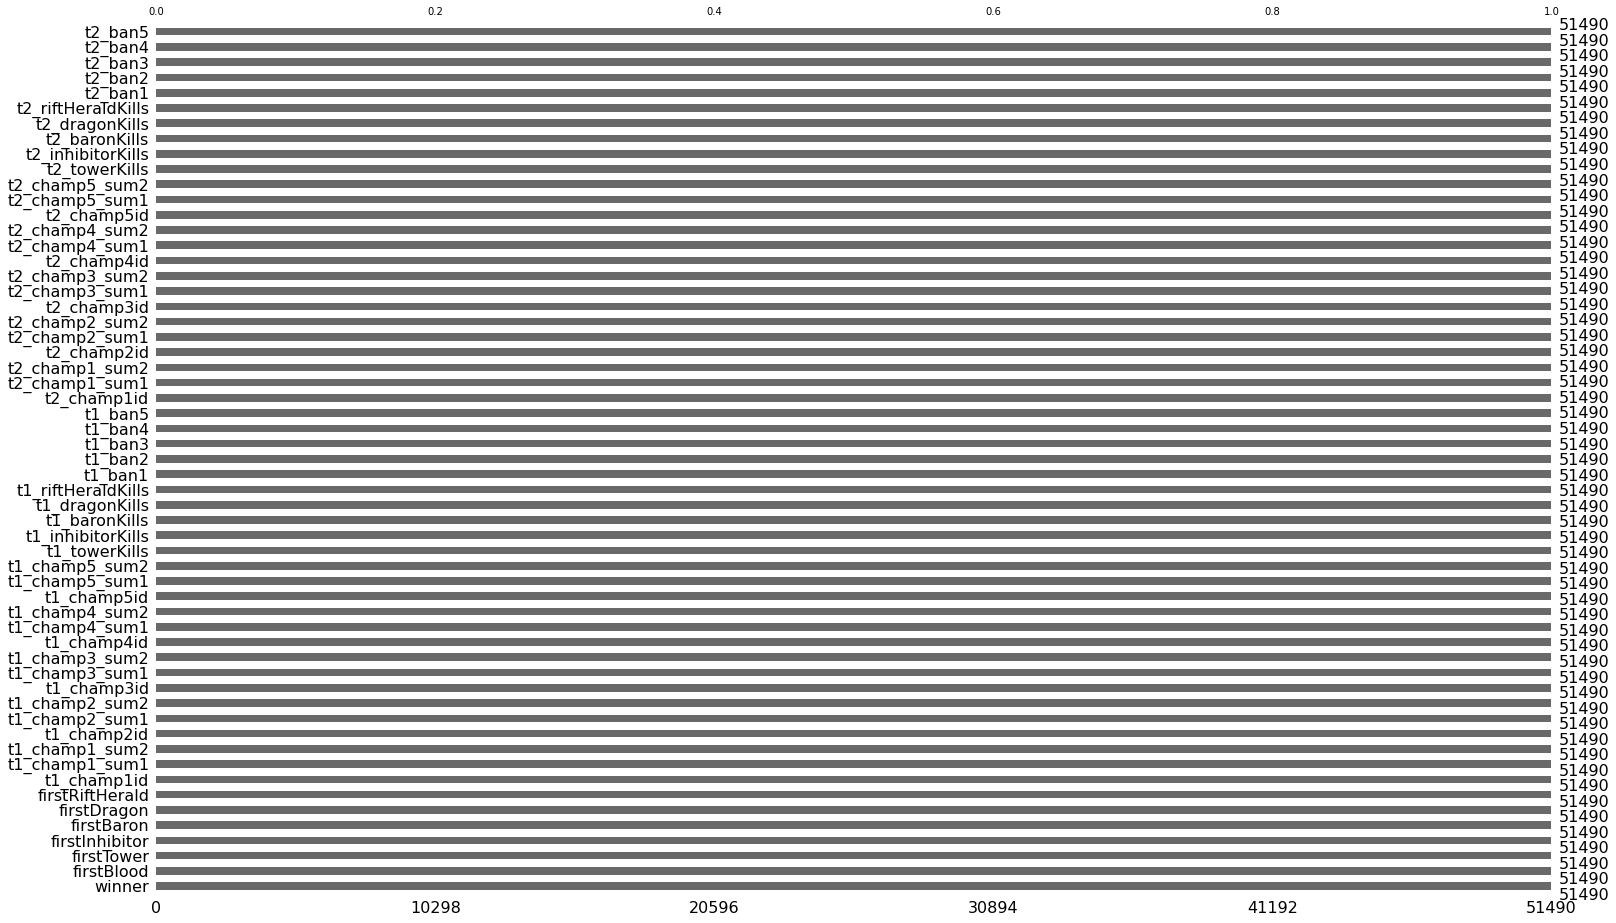

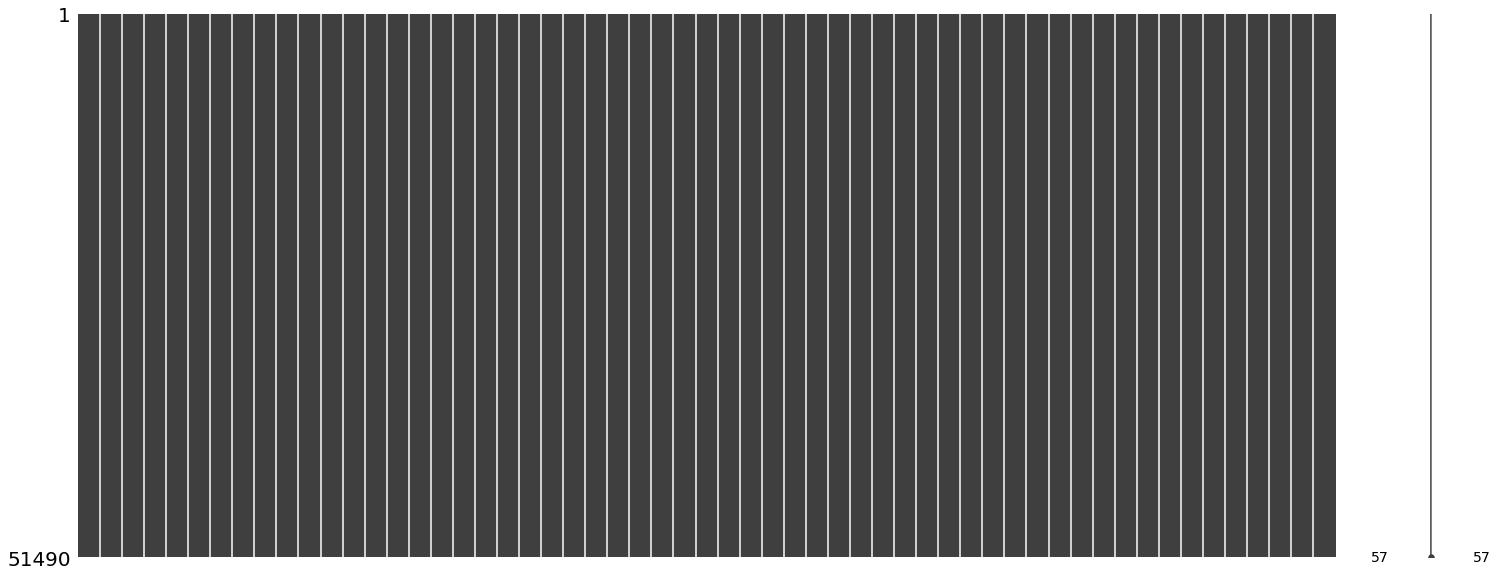

In [ ]:
#check for nan values
msno.bar(df)
msno.matrix(df)
#print missing data sorted by percentage of total values
missing_data = pd.DataFrame({'Total Missing': df.isnull().sum(), 'Percentage of Total Values': df.isnull().sum()/len(df)})
print(missing_data.sort_values('Percentage of Total Values', ascending=False))


Correlation heatmap

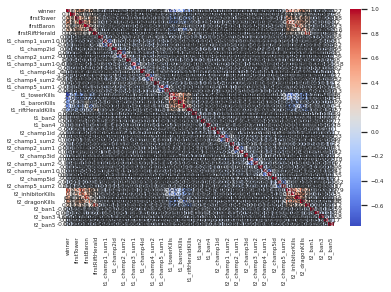

In [ ]:
sns.set(font_scale=0.5)
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

We can see alot of fetures without any correlation, let's drop them and take a look on the interesting ones:

Index(['gameDuration', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor',
       'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_champ1id',
       't1_champ2id', 't1_champ3id', 't1_champ4id', 't1_champ5id',
       't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills',
       't1_riftHeraldKills', 't2_champ1id', 't2_champ2id', 't2_champ3id',
       't2_champ4id', 't2_champ5id', 't2_towerKills', 't2_inhibitorKills',
       't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills'],
      dtype='object')


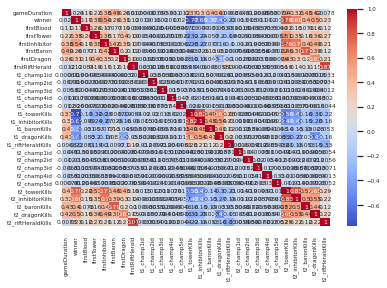

In [ ]:
df_partA = pd.read_csv(csv_path).iloc[:, [2, 4, 5, 6, 7, 8, 9, 10, 11, 14, 17, 20, 23, 26, 27, 28, 29, 30, 36, 39, 42, 45, 48,  51, 52, 53, 54, 55]]
print(df_partA.columns)
sns.heatmap(df_partA.corr(), cmap='coolwarm', annot=True)

Ok. let us zoom in for more:

Index(['gameDuration', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor',
       'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_towerKills',
       't1_inhibitorKills', 't1_baronKills', 't1_dragonKills',
       't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills',
       't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills'],
      dtype='object')


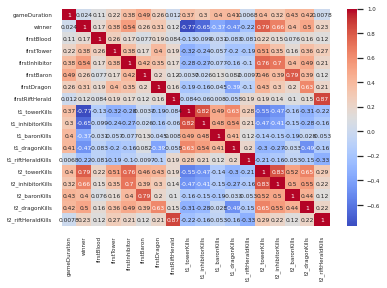

In [ ]:
df_partB = pd.read_csv(csv_path).iloc[:, [2, 4, 5, 6, 7, 8, 9, 10, 26, 27, 28, 29, 30, 51, 52, 53, 54, 55]]
print(df_partB.columns)
sns.heatmap(df_partB.corr(), cmap='coolwarm', annot=True)

Now the same thing but with the champions:

Index(['gameDuration', 'winner', 't1_champ1id', 't1_champ2id', 't1_champ3id',
       't1_champ4id', 't1_champ5id', 't2_champ1id', 't2_champ2id',
       't2_champ3id', 't2_champ4id', 't2_champ5id'],
      dtype='object')


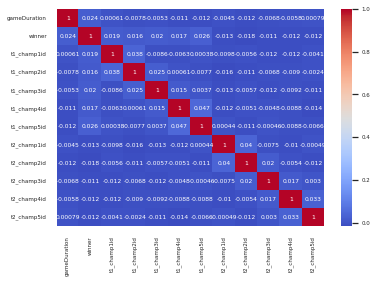

In [ ]:
df_partC = pd.read_csv(csv_path).iloc[:, [2, 4, 11, 14, 17, 20, 23,  36, 39, 42, 45, 48,]]
print(df_partC.columns)
sns.heatmap(df_partC.corr(), cmap='coolwarm', annot=True)

And now only with the first kills:

Index(['gameDuration', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor',
       'firstBaron', 'firstDragon', 'firstRiftHerald'],
      dtype='object')


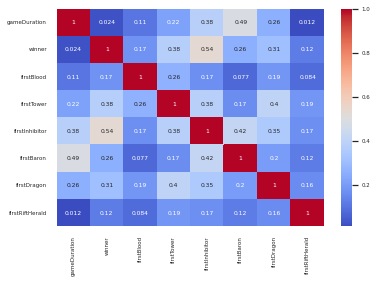

In [ ]:
df_partD = pd.read_csv(csv_path).iloc[:, [2, 4, 5, 6, 7, 8, 9, 10]]
print(df_partD.columns)
sns.heatmap(df_partD.corr(), cmap='coolwarm', annot=True)

Finally, with total kills:

Index(['gameDuration', 'winner', 't1_towerKills', 't1_inhibitorKills',
       't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills'],
      dtype='object')


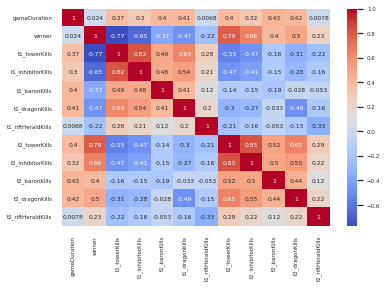

In [ ]:
df_partE = pd.read_csv(csv_path).iloc[:, [2, 4, 26, 27, 28, 29, 30, 51, 52, 53, 54, 55]]
print(df_partE.columns)
sns.heatmap(df_partE.corr(), cmap='coolwarm', annot=True)

OK OK OK SIM GUITAR and let us check if the label feature (win) are same same

Text(0, 0.5, 'Frequency')

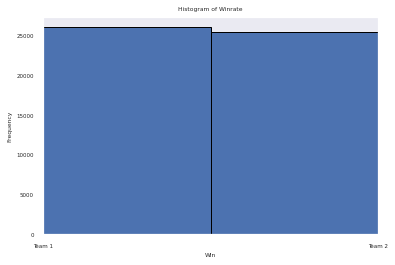

In [ ]:

plt.hist(df['winner'],edgecolor = 'black',bins=2,histtype='bar')
plt.title('Histogram of Winrate')
plt.xlabel('Win')
plt.xticks([1,2],['Team 1','Team 2'])
plt.xlim([1,2])
plt.ylabel('Frequency')


Same check for all "first" things we have

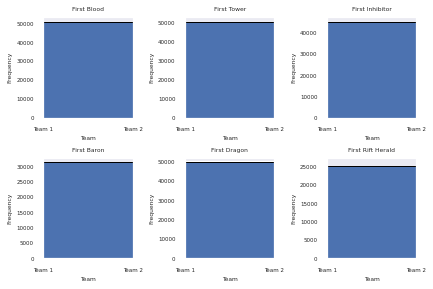

In [ ]:
#plot histogram of "first" variables, all in one picture,2 bins, "1" in blue "2" in red
#add title and axis names
fig, axs = plt.subplots(2, 3)
ax0, ax1, ax2, ax3, ax4, ax5 = axs.flatten()
ax0.hist(df['firstBlood'], edgecolor = 'black',histtype='bar',bins=2)
ax0.set_title('First Blood')
ax0.set_xlabel('Team')
ax0.set_ylabel('Frequency')
ax1.hist(df['firstTower'], edgecolor = 'black',histtype='bar', bins = 2)
ax1.set_title('First Tower')
ax1.set_xlabel('Team')
ax1.set_ylabel('Frequency')
ax2.hist(df['firstInhibitor'],  edgecolor = 'black',histtype='bar', bins = 2)
ax2.set_title('First Inhibitor')
ax2.set_xlabel('Team')
ax2.set_ylabel('Frequency')
ax3.hist(df['firstBaron'], edgecolor = 'black',histtype='bar', bins = 2)
ax3.set_title('First Baron')
ax3.set_xlabel('Team')
ax3.set_ylabel('Frequency')
ax4.hist(df['firstDragon'],edgecolor = 'black',histtype='bar', bins = 2)
ax4.set_title('First Dragon')
ax4.set_xlabel('Team')
ax4.set_ylabel('Frequency')
ax5.hist(df['firstRiftHerald'], edgecolor = 'black',histtype='bar', bins = 2)
ax5.set_title('First Rift Herald')
ax5.set_xlabel('Team')
ax5.set_ylabel('Frequency')
plt.setp(axs, xticks=[1,2], xticklabels=['Team 1','Team 2'])
plt.setp(axs, xlim=[1,2])

fig.tight_layout()


Here we try to check if there corelation between the champions and there spells

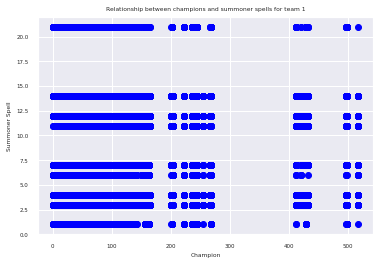

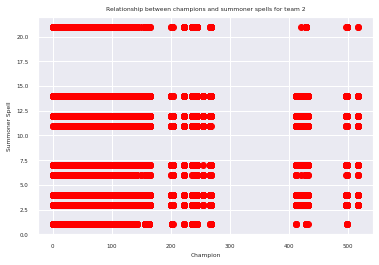

In [ ]:
#plot relastionship between all champions and summoner spells in one graph for t1 and another graph for t2
#add title and axis names
plt.scatter(df['t1_champ1id'], df['t1_champ1_sum1'], color = 'blue')
plt.scatter(df['t1_champ2id'], df['t1_champ2_sum1'], color = 'blue')
plt.scatter(df['t1_champ3id'], df['t1_champ3_sum1'], color = 'blue')
plt.scatter(df['t1_champ4id'], df['t1_champ4_sum1'], color = 'blue')
plt.scatter(df['t1_champ5id'], df['t1_champ5_sum1'], color = 'blue')
plt.scatter(df['t1_champ1id'], df['t1_champ1_sum2'], color = 'blue')
plt.scatter(df['t1_champ2id'], df['t1_champ2_sum2'], color = 'blue')
plt.scatter(df['t1_champ3id'], df['t1_champ3_sum2'], color = 'blue')
plt.scatter(df['t1_champ4id'], df['t1_champ4_sum2'], color = 'blue')
plt.scatter(df['t1_champ5id'], df['t1_champ5_sum2'], color = 'blue')
plt.title('Relationship between champions and summoner spells for team 1')
plt.xlabel('Champion')
plt.ylabel('Summoner Spell')
plt.show()

plt.scatter(df['t2_champ1id'], df['t2_champ1_sum1'], color = 'red')
plt.scatter(df['t2_champ2id'], df['t2_champ2_sum1'], color = 'red')
plt.scatter(df['t2_champ3id'], df['t2_champ3_sum1'], color = 'red')
plt.scatter(df['t2_champ4id'], df['t2_champ4_sum1'], color = 'red')
plt.scatter(df['t2_champ5id'], df['t2_champ5_sum1'], color = 'red')
plt.scatter(df['t2_champ1id'], df['t2_champ1_sum2'], color = 'red')
plt.scatter(df['t2_champ2id'], df['t2_champ2_sum2'], color = 'red')
plt.scatter(df['t2_champ3id'], df['t2_champ3_sum2'], color = 'red')
plt.scatter(df['t2_champ4id'], df['t2_champ4_sum2'], color = 'red')
plt.scatter(df['t2_champ5id'], df['t2_champ5_sum2'], color = 'red')
plt.title('Relationship between champions and summoner spells for team 2')
plt.xlabel('Champion')
plt.ylabel('Summoner Spell')
plt.show()

Here we try to check the numbers of kills

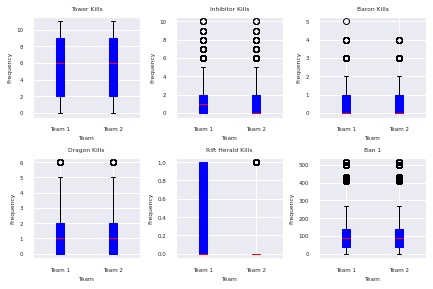

In [ ]:
fig, axs = plt.subplots(2, 3)
ax0, ax1, ax2, ax3, ax4, ax5 = axs.flatten()
ax0.boxplot([df['t1_towerKills'],df['t2_towerKills']], labels = ['Team 1','Team 2'], patch_artist=True, boxprops=dict(facecolor="blue", color="blue"), medianprops=dict(color="red"))
ax0.set_title('Tower Kills')
ax0.set_xlabel('Team')
ax0.set_ylabel('Frequency')
ax1.boxplot([df['t1_inhibitorKills'],df['t2_inhibitorKills']], labels = ['Team 1','Team 2'], patch_artist=True, boxprops=dict(facecolor="blue", color="blue"), medianprops=dict(color="red"))
ax1.set_title('Inhibitor Kills')
ax1.set_xlabel('Team')
ax1.set_ylabel('Frequency')
ax2.boxplot([df['t1_baronKills'],df['t2_baronKills']], labels = ['Team 1','Team 2'], patch_artist=True, boxprops=dict(facecolor="blue", color="blue"), medianprops=dict(color="red"))
ax2.set_title('Baron Kills')
ax2.set_xlabel('Team')
ax2.set_ylabel('Frequency')
ax3.boxplot([df['t1_dragonKills'],df['t2_dragonKills']], labels = ['Team 1','Team 2'], patch_artist=True, boxprops=dict(facecolor="blue", color="blue"), medianprops=dict(color="red"))
ax3.set_title('Dragon Kills')
ax3.set_xlabel('Team')
ax3.set_ylabel('Frequency')
ax4.boxplot([df['t1_riftHeraldKills'],df['t2_riftHeraldKills']], labels = ['Team 1','Team 2'], patch_artist=True, boxprops=dict(facecolor="blue", color="blue"), medianprops=dict(color="red"))
ax4.set_title('Rift Herald Kills')
ax4.set_xlabel('Team')
ax4.set_ylabel('Frequency')
ax5.boxplot([df['t1_ban1'],df['t2_ban1']], labels = ['Team 1','Team 2'], patch_artist=True, boxprops=dict(facecolor="blue", color="blue"), medianprops=dict(color="red"))
ax5.set_title('Ban 1')
ax5.set_xlabel('Team')
ax5.set_ylabel('Frequency')
fig.tight_layout()
plt.show()

